In [32]:
import  pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = {'Temp':[50,50,50,70,70,70,80,80,80,90,90,90,100,100,100],'Yield':[3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3.0,3.1,2.8,3.3,3.5,3.0]}

In [34]:
df = pd.DataFrame(data)
df.to_csv('file.csv')

In [35]:
import numpy as np
import pandas as pd

df = pd.read_csv('file.csv')

X = df['Temp'].values
y = df['Yield'].values

#Pedhazur formula
X_mean = np.mean(X)
y_mean = np.mean(y)
XY_mean = np.mean(X * y)
X_squared_mean = np.mean(X ** 2)

# Compute B1 (slope) and B0 (intercept)
B1 = (XY_mean - X_mean * y_mean) / (X_squared_mean - X_mean ** 2)
B0 = y_mean - B1 * X_mean

# Compute predicted responses
y_pred = B0 + B1 * X

# Compute RMSE
RMSE = np.sqrt(np.mean((y - y_pred) ** 2))


print(f"Intercept (B0): {B0:.2f}")
print(f"Slope (B1): {B1:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(X_mean,y_mean,XY_mean, X_squared_mean)

Intercept (B0): 2.31
Slope (B1): 0.01
RMSE: 0.36
78.0 2.833333333333333 223.0 6380.0


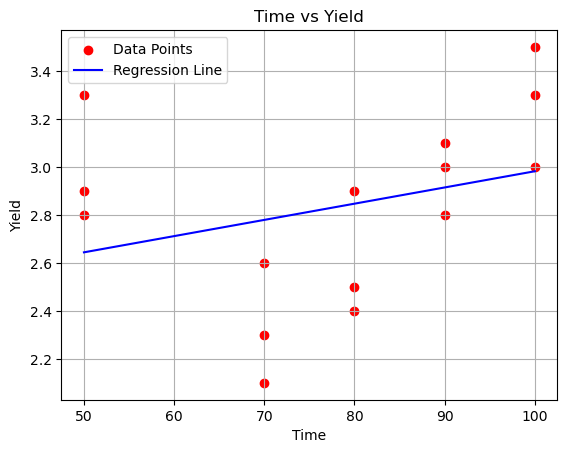

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='red', label='Data Points')

plt.plot(X, y_pred, color='blue', label='Regression Line')

plt.xlabel('Time')
plt.ylabel('Yield')
plt.title('Time vs Yield')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
import numpy as np
import pandas as pd

df = pd.read_csv('file.csv')

X = df['Temp'].values
y = df['Yield'].values


# mat1=np.array([[len(X),np.sum(X)],[np.sum(X),np.sum(X**2)]])
# mat2=np.array([[np.sum(y),np.sum(X*y)]])
# coeffs=np.dot(np.linalg.inv(mat1),mat2.T)
# b0_mat,b1_mat=coeffs[0,0],coeffs[1,0]

# y_mat = b0_mat + b1_mat * X
# squared_errors = (y - y_mat) ** 2
# rmse_mat = np.sqrt(np.mean(squared_errors))

# print(f"{b1_mat}x + {b0_mat}")
# print(y_mat)
# print(rmse_mat)


mat1 = np.array([[len(X),np.sum(X),np.sum(X**2)],[np.sum(X),np.sum(X**2),np.sum(X**3)],[np.sum(X**2),np.sum(X**3),np.sum(X**4)]])
mat2 = np.array([[np.sum(y),np.sum(X*y),np.sum((X**2)*y)]])
print(mat1)
print(mat2)
coeffs = np.dot(np.linalg.inv(mat1),mat2.T)
b0,b1,b2 = coeffs[0,0],coeffs[1,0],coeffs[2,0]
y_prd = b0 + b1*X + b2*(X**2)
squared_err = (y-y_prd)**2
rmse_mat = np.sqrt(np.mean(squared_err))
print(np.mean(squared_err))
print(f"{b0}+{b1}x+{b2}x^2")
print(y_prd)
print(rmse_mat)
print(len(X))
print(np.sum(X))
print(np.sum(X**2))
print(np.sum(X**3))
print(np.sum(X**4))
print(np.sum(y))
print(np.sum(X*y))
print(np.sum((X**2)*y))

[[       15      1170     95700]
 [     1170     95700   8127000]
 [    95700   8127000 710490000]]
[[4.2500e+01 3.3450e+03 2.7681e+05]]
0.04778465063001146
7.960481099654089+-0.15371134020614363x+0.0010756013745701898x^2
[2.96391753 2.96391753 2.96391753 2.47113402 2.47113402 2.47113402
 2.54742268 2.54742268 2.54742268 2.83883162 2.83883162 2.83883162
 3.34536082 3.34536082 3.34536082]
0.21859700508015076
15
1170
95700
8127000
710490000
42.49999999999999
3345.0
276810.0


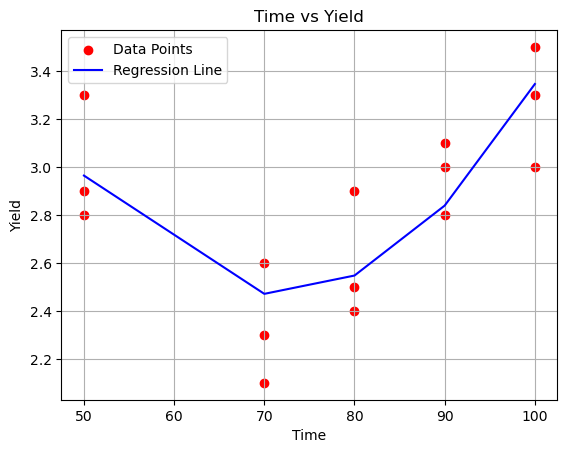

In [38]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='red', label='Data Points')

plt.plot(X, y_prd, color='blue', label='Regression Line')
plt.xlabel('Time')
plt.ylabel('Yield')
plt.title('Time vs Yield')
plt.legend()
plt.grid(True)
plt.show()


# Q2


In [39]:
df = pd.read_csv('heartattack.csv')
df.head()

,Infarc,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0


In [42]:
X1 = df['Area']
X2 = df['X2']
y = df['Infarc']
X3 = df['X3']

mat1 = np.array([[len(X1),np.sum(X1),np.sum(X2),np.sum(X3)],
                 [np.sum(X1),np.sum(X1**2),np.sum(X1*X2),np.sum(X1*X3)],
                 [np.sum(X2),np.sum(X1*X2),np.sum(X2**2),np.sum(X3*X2)],
                 [np.sum(X3),np.sum(X1*X3),np.sum(X2*X3),np.sum(X3**2)]])
mat2 = np.array([[np.sum(y),np.sum(X1*y),np.sum(X2*y),np.sum(X3*y)]])
print(mat1)
print(mat2)
coeffs = np.dot(np.linalg.inv(mat1),mat2.T)
print(mat1)
print(mat2)
b0,b1,b2,b3 = coeffs[0,0],coeffs[1,0],coeffs[2,0],coeffs[3,0]
y_prd = b0 + b1*X1+ b2*(X2) +b3*X3
squared_err = (y-y_prd)**2
rmse_mat = np.sqrt(np.mean(squared_err))
print(np.mean(squared_err))
print(f"{b0}+{b1}x1+{b2}x2+{b3}x3")
print(y_prd)
print(rmse_mat)
print(len(X))
print(np.sum(X1))
print(np.sum(X2))
print(np.sum(X3))
print(np.sum(X2*X3))
print(np.sum(y))
print(np.sum(X1*y))
print(np.sum((X2*y)))
print(np.sum(X3*y))
print(np.sum(X1*X2))
print(np.sum(X1*X3))

[[32.     31.82   11.     11.    ]
 [31.82   33.5768 11.     12.02  ]
 [11.     11.     11.      0.    ]
 [11.     12.02    0.     11.    ]]
[[11.789   12.82256  2.581    5.162  ]]
[[32.     31.82   11.     11.    ]
 [31.82   33.5768 11.     12.02  ]
 [11.     11.     11.      0.    ]
 [11.     12.02    0.     11.    ]]
[[11.789   12.82256  2.581    5.162  ]]
0.0170284226245642
-0.13453637823600895+0.6126549752681919x1+-0.24348223339581987x2+-0.0656556947388709x3
0     0.073766
1     0.257563
2     0.331081
3     0.373967
4     0.312702
5     0.367841
6     0.447486
7     0.514878
8     0.600650
9     0.766066
10   -0.108450
11    0.093726
12    0.173371
13    0.277522
14    0.240763
15    0.253016
16    0.332661
17    0.363294
18    0.357167
19    0.369420
20    0.228510
21    0.271552
22    0.443096
23    0.449222
24    0.424716
25    0.406336
26    0.394083
27    0.485981
28    0.553374
29    0.528867
30    0.547247
31    0.657525
dtype: float64
0.13049299837372194
15
31.82
11
11
0


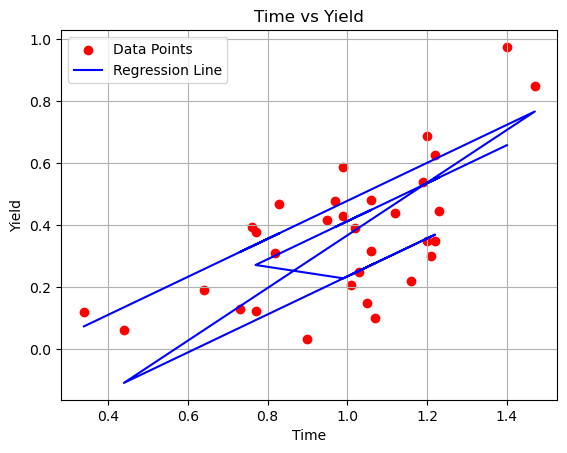

In [28]:
import matplotlib.pyplot as plt

plt.scatter(X1, y, color='red', label='Data Points')

plt.plot(X1, y_prd, color='blue', label='Regression Line')

plt.xlabel('Time')
plt.ylabel('Yield')
plt.title('Time vs Yield')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
X1 = df['Area']
X2 = df['X2']
y = df['Infarc']
X3 = df['X3']
X4 = 
mat1 = np.array([[len(X1),np.sum(X1),np.sum(X2),np.sum(X3),np.sum(X4)],
                 [np.sum(X1),np.sum(X1**2),np.sum(X1*X2),np.sum(X1*X3),np.sum(X1*X4)],
                 [np.sum(X2),np.sum(X1*X2),np.sum(X2**2),np.sum(X3*X2),np.sum(X4*X2)],
                 [np.sum(X3),np.sum(X1*X3),np.sum(X2*X3),np.sum(X3**2),np.sum(X4*X3)],
                 [np.sum(X4),np.sum(X1*X4),np.sum(X2*X4),np.sum(X3*X4),np.sum(X4**2)]])
mat2 = np.array([[np.sum(y),np.sum(X1*y),np.sum(X2*y),np.sum(X3*y),np.sum(X4*y)]])
print(mat1)
print(mat2)
coeffs = np.dot(np.linalg.inv(mat1),mat2.T)
print(mat1)
print(mat2)
b0,b1,b2,b3 = coeffs[0,0],coeffs[1,0],coeffs[2,0],coeffs[3,0]
y_prd = b0 + b1*X1+ b2*(X2) +b3*X3
squared_err = (y-y_prd)**2
rmse_mat = np.sqrt(np.mean(squared_err))
print(np.mean(squared_err))
print(f"{b0}+{b1}x1+{b2}x2+{b3}x3")
print(y_prd)
print(rmse_mat)
print(len(X))
print(np.sum(X1))
print(np.sum(X2))
print(np.sum(X3))
print(np.sum(X2*X3))
print(np.sum(y))
print(np.sum(X1*y))
print(np.sum((X2*y)))
print(np.sum(X3*y))
print(np.sum(X1*X2))
print(np.sum(X1*X3))

NameError: name 'X4' is not defined